## a) Visualization of DAX-30 Index since 2000 (original & logarithmic)

### Data Preprocessing

In [ ]:
# Import required packages #####################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta


In [ ]:
# Import Datasets
daxkurs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Promotion_Python/04_DAX_Kursindex_Analyse/01_Datensätze/DAX_KursIndex.csv", 
                      error_bad_lines= False, parse_dates= ["Datum"], sep = ";", decimal= ",", index_col = ["Datum"])

daxkurs.head()

,Schluss
Datum,
03.01.2000,"5.248,12"
04.01.2000,"5.120,77"
05.01.2000,"5.054,78"
06.01.2000,"5.033,67"
07.01.2000,"5.271,59"


In [ ]:
# Check for NaN values
daxkurs.isnull().values.any()

# Count NaN values
daxkurs.isnull().sum()

# Locate NaN values
row_has_NaN = daxkurs.isnull().any(axis = 1)
daxkurs[row_has_NaN]

,Schluss
Datum,
,NaN


In [ ]:
# Remove NaN values
daxkurs = daxkurs.dropna()
daxkurs.tail()

,Schluss
Datum,
19.10.2021,"6.556,16"
20.10.2021,"6.559,15"
21.10.2021,"6.537,87"
22.10.2021,"6.567,63"
25.10.2021,"6.591,40"


In [ ]:
# Change "Schluss"-type into integers
daxkurs["Schluss"] = daxkurs["Schluss"].str.replace("[\.\,]", "").astype(int)
daxkurs.head()

,Schluss
Datum,
03.01.2000,524812
04.01.2000,512077
05.01.2000,505478
06.01.2000,503367
07.01.2000,527159


In [ ]:
# Divide by 100
daxkurs["Schluss"] = [x / 100 for x in daxkurs["Schluss"]]

In [ ]:
# Check "Schluss"-column for numerical format
daxkurs.dtypes

Schluss    float64
dtype: object

In [ ]:
# Create datetime object for correct plotting Notwendig für Achsenbeschriftung ##
# daxkurs["datetime"] = pd.to_datetime(daxkurs.index)
# daxkurs.head()

### Data Transformation

In [ ]:
# Rename "Schluss column" ######################################################
daxkurs.rename(columns = {"Schluss": "Orig-Kurs"}, inplace = True)
daxkurs.head()

,Orig-Kurs
Datum,
03.01.2000,5248.12
04.01.2000,5120.77
05.01.2000,5054.78
06.01.2000,5033.67
07.01.2000,5271.59


In [ ]:
# Create new column of logarithmic Prices ######################################
daxkurs["Log-Kurs"] = [np.log(x) for x in daxkurs["Orig-Kurs"]]
daxkurs.head()

,Orig-Kurs,Log-Kurs
Datum,,
03.01.2000,5248.12,8.565625
04.01.2000,5120.77,8.541060
05.01.2000,5054.78,8.528090
06.01.2000,5033.67,8.523905
07.01.2000,5271.59,8.570087


In [ ]:
# Compute Price differences (original & logarithmic) ###########################
daxkurs["Orig-Differenz"] = daxkurs["Orig-Kurs"].diff()
daxkurs["Log-Differenz"] = daxkurs["Log-Kurs"].diff()
daxkurs.head()

,Orig-Kurs,Log-Kurs,Orig-Differenz,Log-Differenz
Datum,,,,
03.01.2000,5248.12,8.565625,NaN,NaN
04.01.2000,5120.77,8.541060,-127.35,-0.024565
05.01.2000,5054.78,8.528090,-65.99,-0.012970
06.01.2000,5033.67,8.523905,-21.11,-0.004185
07.01.2000,5271.59,8.570087,237.92,0.046183


In [ ]:
# Remove Rows including NaN values #############################################
daxkurs = daxkurs.dropna()
daxkurs.head()

,Orig-Kurs,Log-Kurs,Orig-Differenz,Log-Differenz
Datum,,,,
04.01.2000,5120.77,8.541060,-127.35,-0.024565
05.01.2000,5054.78,8.528090,-65.99,-0.012970
06.01.2000,5033.67,8.523905,-21.11,-0.004185
07.01.2000,5271.59,8.570087,237.92,0.046183
10.01.2000,5383.97,8.591181,112.38,0.021094


In [ ]:
# Computing 30-day rolling Variance ############################################

daxkurs["Orig-Diff-Varianz"] = daxkurs["Orig-Differenz"].rolling(window = 30).var()
daxkurs["Log-Diff-Varianz"] = daxkurs["Log-Differenz"].rolling(window = 30).var()
daxkurs = daxkurs.dropna()
daxkurs.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Orig-Kurs,Log-Kurs,Orig-Differenz,Log-Differenz,Orig-Diff-Varianz,Log-Diff-Varianz
Datum,,,,,,
14.02.2000,5943.15,8.689995,25.85,0.004359,11846.447184,0.000400
15.02.2000,5749.83,8.656926,-193.32,-0.033069,12676.318695,0.000419
16.02.2000,5823.05,8.669579,73.22,0.012654,12487.436327,0.000411
17.02.2000,5893.18,8.681551,70.13,0.011972,12470.952300,0.000410
18.02.2000,5887.94,8.680661,-5.24,-0.000890,10932.465005,0.000351


### Visualization of Price & Price-Variance

In [ ]:
daxkurs.index.dtype

dtype('O')

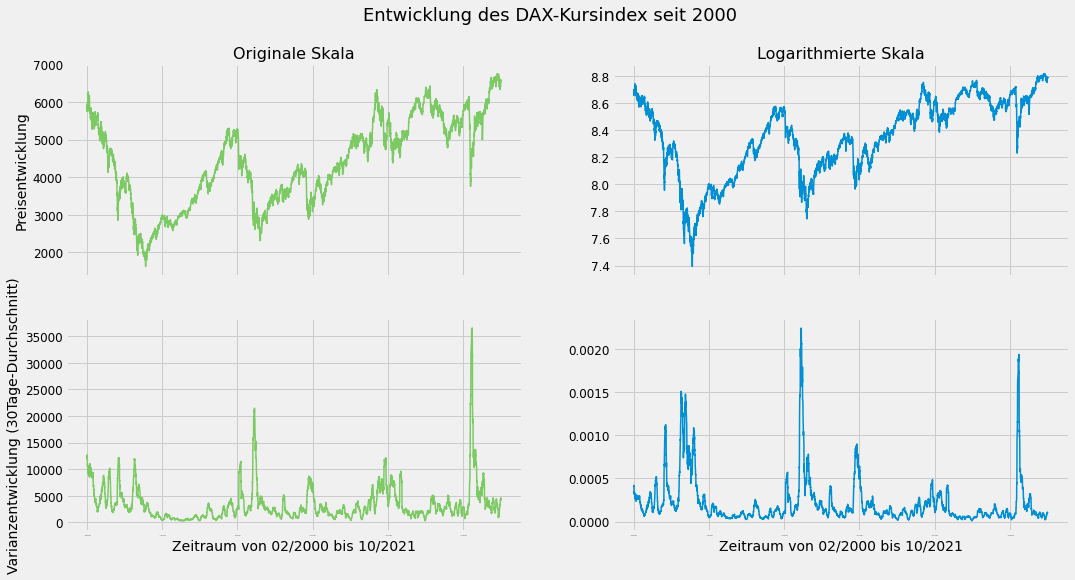

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, figsize = (16,8))

# Draw index trajectory ########################################################
daxkurs["Orig-Kurs"].plot(ax = ax[0,0], linewidth = 1.5, color = "#7CCA63", xlabel = "")
daxkurs["Log-Kurs"].plot(ax = ax[0,1], linewidth = 1.5, xlabel = "")
daxkurs["Orig-Diff-Varianz"].plot(ax = ax[1,0], linewidth = 1.5, color = "#7CCA63", xlabel = "")
daxkurs["Log-Diff-Varianz"].plot(ax = ax[1,1], linewidth = 1.5, xlabel = "")


# Set descriptions (title, axes labels) ########################################
# xticks are automatically defined since index is written as datetime-format

ax[1,0].tick_params(axis = "x", labelsize = 0)
ax[1,1].tick_params(axis = "x", labelsize = 0)
ax[0,0].tick_params(axis = "y", labelsize = 12)
ax[0,1].tick_params(axis = "y", labelsize = 12)
ax[1,0].tick_params(axis = "y", labelsize = 12)
ax[1,1].tick_params(axis = "y", labelsize = 12)

ax[1,0].set_xlabel("Zeitraum von 02/2000 bis 10/2021", fontsize = 14)
ax[1,1].set_xlabel("Zeitraum von 02/2000 bis 10/2021", fontsize = 14)
ax[0,0].set_ylabel("Preisentwicklung", fontsize = 14)
ax[1,0].set_ylabel("Varianzentwicklung (30Tage-Durchschnitt)", fontsize = 14)

ax[0,0].set_title("Originale Skala", fontsize = 16)
ax[0,1].set_title("Logarithmierte Skala", fontsize = 16)

plt.suptitle("Entwicklung des DAX-Kursindex seit 2000", fontsize = 18)
plt.show()

### Visualization of Price-Variance using Boxplots

In [ ]:
# Make cope of daxkurs df to prepare data for Variance-Visualization ###########
daxkurs_var = daxkurs.copy()
daxkurs_var.index = pd.to_datetime(daxkurs_var.index)

daxkurs_var.head()

daxkurs_var["Jahr"] = [x.month for x in daxkurs_var.index]

In [ ]:
# Create new column of Jahres-values ###########################################
daxkurs_var["Jahr"] = [x.year for x in daxkurs_var.index]
daxkurs_var.head()

,Orig-Kurs,Log-Kurs,Orig-Differenz,Log-Differenz,Orig-Diff-Varianz,Log-Diff-Varianz,Jahr
Datum,,,,,,,
2000-02-14,5943.15,8.689995,25.85,0.004359,11846.447184,0.000400,2000
2000-02-15,5749.83,8.656926,-193.32,-0.033069,12676.318695,0.000419,2000
2000-02-16,5823.05,8.669579,73.22,0.012654,12487.436327,0.000411,2000
2000-02-17,5893.18,8.681551,70.13,0.011972,12470.952300,0.000410,2000
2000-02-18,5887.94,8.680661,-5.24,-0.000890,10932.465005,0.000351,2000


In [ ]:
# Subset daxkurs_var df and reduce to necessary columns ########################
daxkurs_var = daxkurs_var[["Jahr", "Orig-Kurs", "Log-Differenz", "Log-Diff-Varianz"]]
daxkurs_var.head()

,Jahr,Orig-Kurs,Log-Differenz,Log-Diff-Varianz
Datum,,,,
2000-02-14,2000,5943.15,0.004359,0.000400
2000-02-15,2000,5749.83,-0.033069,0.000419
2000-02-16,2000,5823.05,0.012654,0.000411
2000-02-17,2000,5893.18,0.011972,0.000410
2000-02-18,2000,5887.94,-0.000890,0.000351


In [ ]:
# Compute Annual Mean of Variance of Price-differences ################################################
daxkurs_var_mean = daxkurs_var.groupby("Jahr").mean()
daxkurs_var_mean

,Orig-Kurs,Log-Differenz,Log-Diff-Varianz
Jahr,,,
2000,5496.893170,-0.000811,0.000211
2001,4261.119209,-0.000943,0.000341
2002,3116.955810,-0.002356,0.000614
2003,2316.753241,0.001140,0.000436
2004,2828.247588,0.000195,0.000101
2005,3240.480739,0.000831,0.000060
2006,3982.339255,0.000684,0.000092
2007,4918.732421,0.000695,0.000094
2008,3979.378740,-0.002169,0.000538


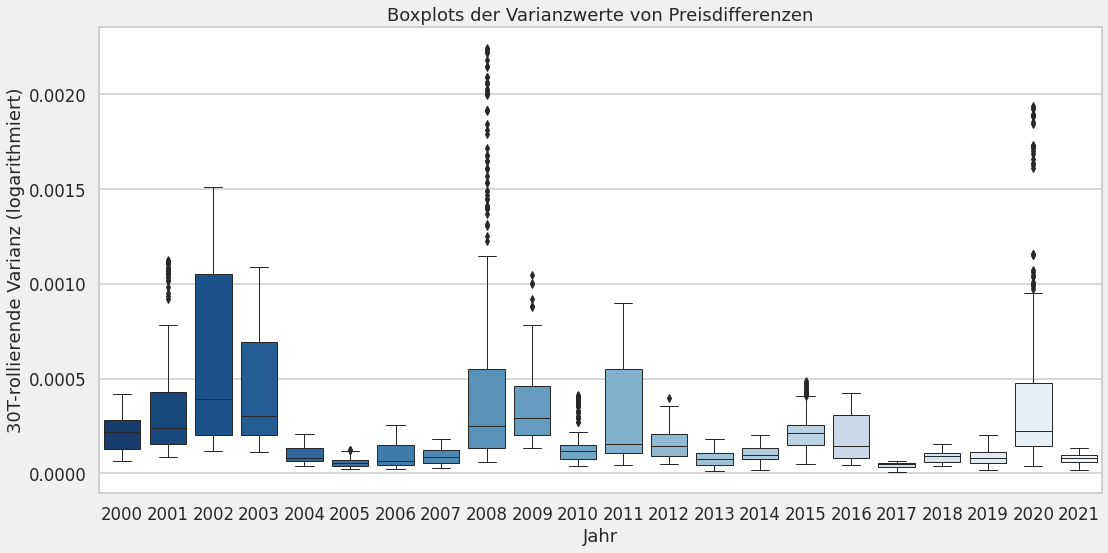

In [ ]:
import seaborn as sns

plt.figure(figsize = (16,8))

plt.style.use("seaborn-whitegrid")
sns.set_style("whitegrid")
sns.set_palette("Blues_r", n_colors = 22)
sns.set_context("talk")

daxkurs_var_mean["Log-Diff-Varianz"].plot(linestyle = "--", linewidth = 10, color = "r")

variances = sns.boxplot(x = "Jahr", y = "Log-Diff-Varianz", data = daxkurs_var, linewidth = 1.0)
variances.set(ylabel = "30T-rollierende Varianz (logarithmiert)", title= "Boxplots der Varianzwerte von Preisdifferenzen");

In [ ]:
variances.figure.savefig("/content/drive/MyDrive/Colab Notebooks/Promotion_Python/04_DAX_Kursindex_Analyse/01_DAXKurs_Varianz_Boxplots.pdf", bbox_inches = "tight")